# Question 2

In [182]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import random
import math
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.display import display, HTML
%config InlineBackend.figure_format = 'svg'

# Part A

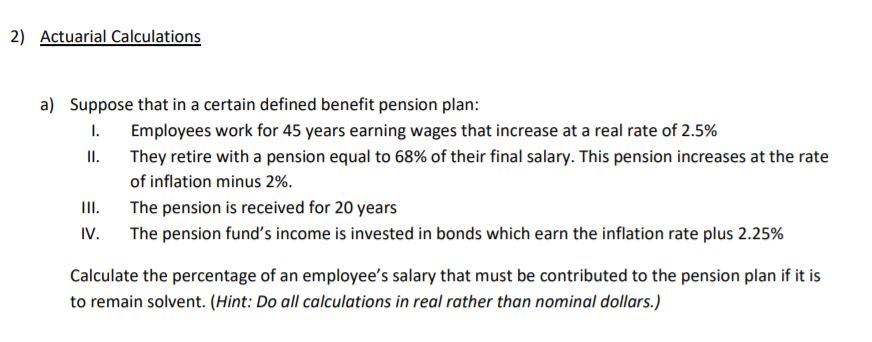

In [50]:
Image("Q2_P1.JPG")

In [57]:
def opt_func(emp_contri, inflation = 0 ):
    
    start_salary = 1
    wage_real_rate = 0.025 + inflation
    pension_growth_rate = -0.02 + inflation
    
    table = []
    asset_value = start_salary*emp_contri

    table.append([1, start_salary, start_salary*emp_contri,0,start_salary*emp_contri])
    for i in range(1,65):

        if(i<45):
            start_salary = (1+wage_real_rate)*start_salary
            emp_contr = start_salary*emp_contri
            asset_value = asset_value*np.exp(0.0225) + emp_contr
            table.append([i+1, start_salary, emp_contr, 0, asset_value])   
            pension_doleout = 0.68*start_salary

        if(i>=45):
            start_salary = 0
            emp_contr = start_salary*emp_contri
            asset_value = asset_value*np.exp(0.0225) - pension_doleout
            table.append([i+1, start_salary, emp_contr, pension_doleout, asset_value])   
            pension_doleout = pension_doleout*np.exp(-0.02)
            
    return(np.abs(table[-1][-1]-0))

In [58]:
temp = np.round(minimize(opt_finc, 0.2).x[0]*100,4)
print('The percentage of an employee’s salary that must be contributed to the pension plan if it is to remain solvent is', temp, '%')

The percentage of an employee’s salary that must be contributed to the pension plan if it is to remain solvent is 21.3278 %


#### The percentage of an employee’s salary that must be contributed to the pension plan if it is to remain solvent is 21.3278 %
#### Nore: All the rates are considered to be continous in nature. When using annual rates the number becomes 21.45%

# Part B

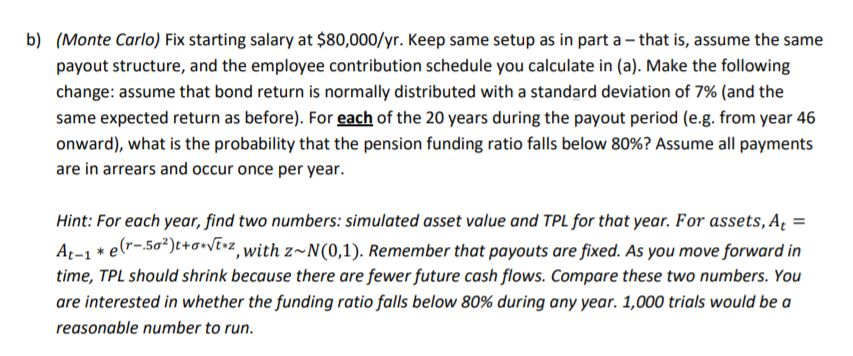

In [51]:
Image("Q2_P2.JPG")

In [71]:
np.random.seed(123)
z_values = np.random.normal(0.0225,0.07, size = (1000,65))

In [184]:
start_salary = 80000
wage_real_rate = 0.0250
emp_contri = 0.214565
pension_growth_rate = -0.02

table = []

asset_value = start_salary*emp_contri

table.append([1, start_salary, start_salary*emp_contri,0,start_salary*emp_contri])
for i in range(1,65):
    
    if(i<45):
        start_salary = (1+wage_real_rate)*start_salary
        emp_contr = start_salary*emp_contri
        asset_value = asset_value*np.exp(z_values[1][i]) + emp_contr
        table.append([i+1, start_salary, emp_contr, 0, asset_value])   
        pension_doleout = 0.68*start_salary

    if(i>=45):
        start_salary = 0
        emp_contr = start_salary*emp_contri
        asset_value = asset_value*np.exp(z_values[1][i]) - pension_doleout
        table.append([i+1, start_salary, emp_contr, pension_doleout, asset_value])   
        pension_doleout = pension_doleout*np.exp(-0.02)


pd.DataFrame(table, columns=['Year','Emp_Salary','Emp_contri','Pension_Doleout','Asset_Value']).round(2)

,Year,Emp_Salary,Emp_contri,Pension_Doleout,Asset_Value
0,1,80000.00,17165.20,0.00,17165.20
1,2,82000.00,17594.33,0.00,35206.12
2,3,84050.00,18034.19,0.00,53458.68
3,4,86151.25,18485.04,0.00,68761.05
4,5,88305.03,18947.17,0.00,90261.98
5,6,90512.66,19420.85,0.00,114814.03
6,7,92775.47,19906.37,0.00,130695.96
7,8,95094.86,20404.03,0.00,165403.20
8,9,97472.23,20914.13,0.00,177574.76
9,10,99909.04,21436.98,0.00,177971.21


#### The above is just a table to display for one iteration as how the different components of pension account changes with time.

In [183]:
df = pd.DataFrame(table, columns=['Year','Emp_Salary','Emp_contri','Pension_Doleout','Asset_Value'])
r = -0.0225
FundingRatio = []
dis_cumu_TPL = []

for i in range(45,65):
    totalAssets = df.loc[i]['Asset_Value']
    cumTPL = df.loc[i:]['Pension_Doleout']
    disc = [np.exp(r*(j-44)) for j in range(i,65)]
    TPL = np.sum(np.array(cumTPL)*np.array(disc))
    FundingRatio.append(totalAssets/TPL)
    dis_cumu_TPL.append(TPL)
    
    
df = df[45:]
df['dis_cumu_TPL'] = dis_cumu_TPL
df['FundingRatio'] = FundingRatio
df['Fund<80%'] = [int(i<0.80) for i in df['FundingRatio']]
df = df.round(2)

def highlight_max(s):
    is_max = s == 1
    return ['background-color: pink' if v else 'background-color: lightgreen' for v in is_max]


df.style.apply(highlight_max, subset = ['Fund<80%'])

,Year,Emp_Salary,Emp_contri,Pension_Doleout,Asset_Value,dis_cumu_TPL,FundingRatio,Fund<80%
45,46,0.000000,0.000000,161231.160000,1731880.640000,2169324.460000,0.800000,1
46,47,0.000000,0.000000,158038.570000,1774257.100000,2011680.490000,0.880000,0
47,48,0.000000,0.000000,154909.200000,1568693.360000,1860596.020000,0.840000,0
48,49,0.000000,0.000000,151841.790000,1509840.390000,1715798.100000,0.880000,0
49,50,0.000000,0.000000,148835.120000,1508806.160000,1577025.150000,0.960000,0
50,51,0.000000,0.000000,145887.990000,1427656.290000,1444026.490000,0.990000,0
51,52,0.000000,0.000000,142999.210000,1183532.440000,1316561.830000,0.900000,0
52,53,0.000000,0.000000,140167.640000,1042449.960000,1194400.920000,0.870000,0
53,54,0.000000,0.000000,137392.130000,1085516.900000,1077323.070000,1.010000,0
54,55,0.000000,0.000000,134671.580000,828814.800000,965116.770000,0.860000,0


#### The above table shows how the funding ratio changes across year for one of the iterations when discount rate used is 2.25%.

In [67]:
def main_func(r = 0.0225, iterations = 1000):
    fund_matrix = pd.DataFrame()

    for iteration in range(iterations):

        start_salary = 80000
        wage_real_rate = 0.0250
        emp_contri = 0.214565
        pension_growth_rate = -0.02

        table = []

        asset_value = start_salary*emp_contri

        table.append([1, start_salary, start_salary*emp_contri,0,start_salary*emp_contri])
        for i in range(1,65):

            if(i<45):
                start_salary = (1+wage_real_rate)*start_salary
                emp_contr = start_salary*emp_contri
                asset_value = asset_value*np.exp(z_values[iteration][i]) + emp_contr
                table.append([i+1, start_salary, emp_contr, 0, asset_value])   
                pension_doleout = 0.68*start_salary

            if(i>=45):
                start_salary = 0
                emp_contr = start_salary*emp_contri
                asset_value = asset_value*np.exp(z_values[iteration][i]) - pension_doleout
                table.append([i+1, start_salary, emp_contr, pension_doleout, asset_value])   
                pension_doleout = pension_doleout*np.exp(-0.02)


        df = pd.DataFrame(table, columns=['Year','Emp_Salary','Emp_contri','Pension_Doleout','Asset_Value'])

        FundingRatio = []
        for i in range(45,65):
            totalAssets = df.loc[i]['Asset_Value']
            cumTPL = df.loc[i:]['Pension_Doleout']
            disc = [np.exp(-r*(j-44)) for j in range(i,65)]
            TPL = np.sum(np.array(cumTPL)*np.array(disc))
            FundingRatio.append(totalAssets/TPL)

        df = df[45:]
        df['FundingRatio'] = FundingRatio
        df['Fund<80%'] = [int(i<0.80) for i in df['FundingRatio']]
        #display(df)
        fund_matrix[iteration] = df['Fund<80%']
   

    sum = 0
    for i in range(1000):
        sum = sum + max(fund_matrix[i])

    temp = sum*100/fund_matrix.shape[1]
    print('% of trials in which the funding ratio falls below 80% with discount rate', r,  '% during any year is ', temp, '%')
    
    return(fund_matrix)

In [68]:
fund_matrix_1 = main_func(r = 0.0225, iterations=1000)
fund_matrix_2 = main_func(r = 0.0, iterations=1000)

% of trials in which the funding ratio falls below 80% with discount rate 0.0225 % during any year is  51.2 %
% of trials in which the funding ratio falls below 80% with discount rate 0.0 % during any year is  63.8 %



###### % of trials in which the funding ratio falls below 80% with discount rate 0.0225 % during any year is  51.2 %

#### % of trials in which the funding ratio falls below 80% with discount rate 0.0 % during any year is  63.8 %

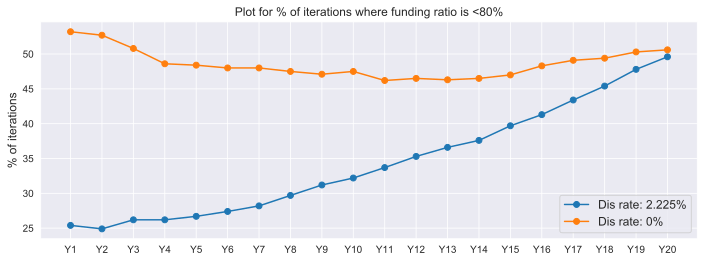

In [192]:
df_temp1 = pd.DataFrame(fund_matrix_1.sum(axis =1)*100/fund_matrix_1.shape[1]).reset_index(drop = True)
df_temp2 = pd.DataFrame(fund_matrix_2.sum(axis =1)*100/fund_matrix_2.shape[1]).reset_index(drop = True)
df_temp1.index = [ 'Y'+ str(i) for i in range(1,21)]
df_temp1._1column = ['%_value']

plt.figure(figsize=(11.8,4))
plt.title('Plot for % of iterations where funding ratio is <80%', fontsize = 12)
plt.ylabel('% of iterations', fontsize = 12)
_ = plt.plot(df_temp1, marker = 'o', label = 'Dis rate: 2.225%')
_ = plt.plot(df_temp2, marker = 'o', label = 'Dis rate: 0%')
_ = plt.legend(fontsize = 12)

#### The above graph displays % of trials across each year where the funding ratio went below 80% for both type of discount rates. As expected, we can see there is a gradual increase in numbers when using 2.25% rate.